# CustardPy API

Here we provide some small Python pieces that use the functions of CustardPy.
This notebook assumes that the output of [the CustardPy tutorial](https://custardpy.readthedocs.io/en/latest/content/StepbyStep.html) is stored in the `CustardPyResults_Hi-C/Juicer_hg38/` directory.

In [30]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from custardpy.loadData import *
from custardpy.HiCmodule import *
from custardpy.PlotModule import *
from custardpy.plotHiCfeature_module import *
from custardpy.DirectionalRelativeFreq import *

cm = generate_cmap(['#1310cc', '#FFFFFF', '#d10a3f'])

In [31]:
# Specify samples to plot
samplelist = ['Control', 'siCTCF', 'siRad21']

Define the function to read the contact matrix and PC1 value from the `CustardPyResults_Hi-C` directory.

The `JuicerMatrix` function loads the contact matrix and the eigenvector (PC1). Here we define the `get_samples` function that returns the list of the JuicerMatrix object.

In [32]:
dirname = "CustardPyResults_Hi-C/Juicer_hg38"

def get_samples(samplelist, chr, norm, resolution):
    samples = []
    for sample in samplelist:
        observed = f"{dirname}/{sample}/Matrix/intrachromosomal/{resolution}/observed.{norm}.{chr}.matrix.gz"
        eigenfile = f"{dirname}/{sample}/Eigen/{resolution}/eigen.{norm}.{chr}.txt.gz"
        samples.append(JuicerMatrix("RPM", observed, resolution, eigenfile=eigenfile))
    return samples

### Chromosome 14, 20 Mbp to 107 Mbp

As an example, we plot the contact matrix of the entire chromosome 14 (from 20 Mbp to 107 Mbp) with 100 kbp resolution.
This setting is mainly for viewing the compartment structure.

In [33]:
# Load contact maps for chromosome 14
chr = "chr14"
resolution = 100000
norm = "SCALE"

samples = get_samples(samplelist, chr, norm, resolution)
nsample = len(samples)

CustardPyResults_Hi-C/Juicer_hg38/Control/Matrix/intrachromosomal/100000/observed.SCALE.chr14.matrix.gz
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/Matrix/intrachromosomal/100000/observed.SCALE.chr14.matrix.gz
CustardPyResults_Hi-C/Juicer_hg38/siRad21/Matrix/intrachromosomal/100000/observed.SCALE.chr14.matrix.gz


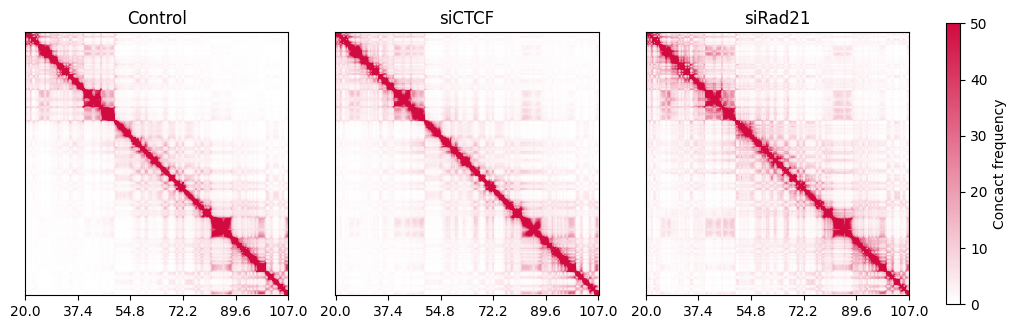

In [34]:
s = 20000000  # start position
e = 107000000 # end position
vmin = 0  # minimum value of the color scale
vmax = 50 # maximum value of the color scale

plt.figure(figsize=(10, 5))
for i, sample in enumerate(samples):
    label = samplelist[i]
    ax = plt.subplot(1, 3, i+1)
    mat = sample.getmatrix().loc[s:e,s:e]
    im = ax.imshow(mat, clim=(vmin, vmax), cmap=generate_cmap(['#FFFFFF', '#d10a3f']))
    ax.set_title(label)
    pltxticks_subplot2grid(0, mat.shape[1], s, e, 5, ax=ax)
    ax.set_yticks([])
plt.tight_layout()

cbar = plt.colorbar(im, ax=plt.gcf().axes, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('Concact frequency')

Alternatively, you can use the log scale contact frequency with the `getlog` function to emphasize the TAD and compartment structure.

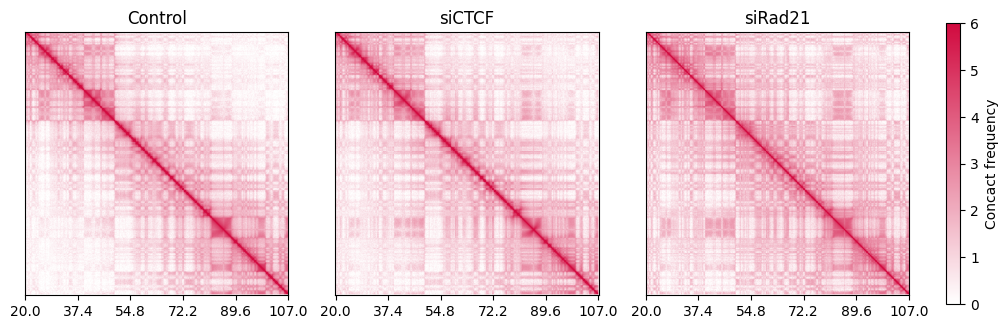

In [35]:
s = 20000000  # start position
e = 107000000 # end position
vmin = 0  # minimum value of the color scale
vmax = 6 # maximum value of the color scale

plt.figure(figsize=(10, 5))
for i, sample in enumerate(samples):
    label = samplelist[i]
    ax = plt.subplot(1, 3, i+1)
    mat = sample.getlog().loc[s:e,s:e]
    im = ax.imshow(mat, clim=(vmin, vmax), cmap=generate_cmap(['#FFFFFF', '#d10a3f']))
    ax.set_title(label)
    pltxticks_subplot2grid(0, mat.shape[1], s, e, 5, ax=ax)
    ax.set_yticks([])
plt.tight_layout()

cbar = plt.colorbar(im, ax=plt.gcf().axes, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('Concact frequency')

### chromosome 21, 25 Mbp to 31 Mbp

Next, we plot the region from 25 Mbp to 31 Mbp of chromosome 21 at 25 kbp resolution.
This region corresponds to  the Figure 1A of [[Haarhuis et al. Cell, 2017]](https://linkinghub.elsevier.com/retrieve/pii/S0092-8674(17)30426-9).

In [36]:
resolution = 25000
norm = "SCALE"
chr="chr21"

samples = get_samples(samplelist, chr, norm, resolution)
nsample = len(samples)

CustardPyResults_Hi-C/Juicer_hg38/Control/Matrix/intrachromosomal/25000/observed.SCALE.chr21.matrix.gz
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/Matrix/intrachromosomal/25000/observed.SCALE.chr21.matrix.gz
CustardPyResults_Hi-C/Juicer_hg38/siRad21/Matrix/intrachromosomal/25000/observed.SCALE.chr21.matrix.gz


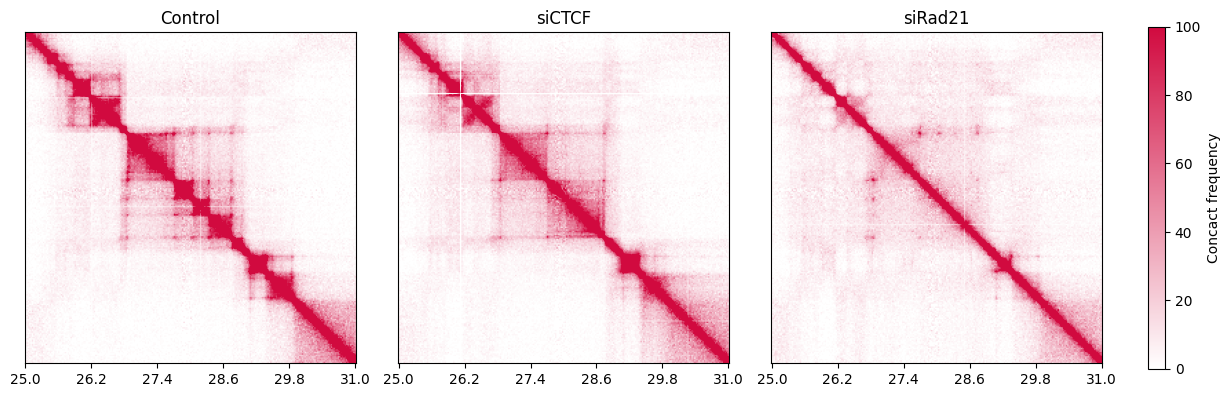

In [37]:
s = 25000000
e = 31000000
vmax = 100
vmin = 0

plt.figure(figsize=(12, 10))
for i, sample in enumerate(samples):
    label = samplelist[i]
    ax = plt.subplot(1, 3, i+1)
    mat = sample.getmatrix().loc[s:e,s:e]
    im = ax.imshow(mat, clim=(vmin, vmax), cmap=generate_cmap(['#FFFFFF', '#d10a3f']))
    ax.set_title(label)
    pltxticks_subplot2grid(0, mat.shape[1], s, e, 5, ax=ax)
    ax.set_yticks([])
plt.tight_layout()

cbar = plt.colorbar(im, ax=plt.gcf().axes, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('Concact frequency')

The heatmaps clearly show the difference in TAD and loop structures between samples.

### Plotting a sample pair in a single heatmap

Use the `plot_SamplePair_triu` function to plot a sample pair in a single heatmap.
Here we visualize `Control` and `siRad21`.

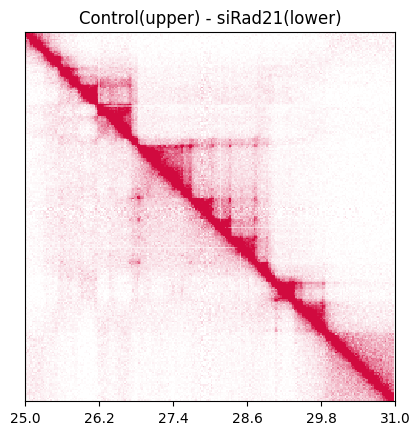

In [38]:
resolution=25000
s = 25000000
e = 31000000
vmax = 100
vmin = 0

sample1 = samples[0]
sample2 = samples[2]
label1 = samplelist[0]
label2 = samplelist[2]

plot_SamplePair_triu(sample1, sample2, label1, label2,
                     resolution, s, e, vmax, vmin)

### Triangle heatmap with TADs and loops

Let's visualize triangle heatmaps. 
CustardPy has a `plot_HiC_Map` function to visualize the Hi-C triangle heatmap.

Here we also visualize TADs and loops by specifying the path of the TADs and the loops called in the CustardPy workflow (see [the tutorial](https://custardpy.readthedocs.io/en/latest/content/StepbyStep.html) for details).
The loaded file paths are displayed in the logs, so you can verify that the correct files are being visualized.

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


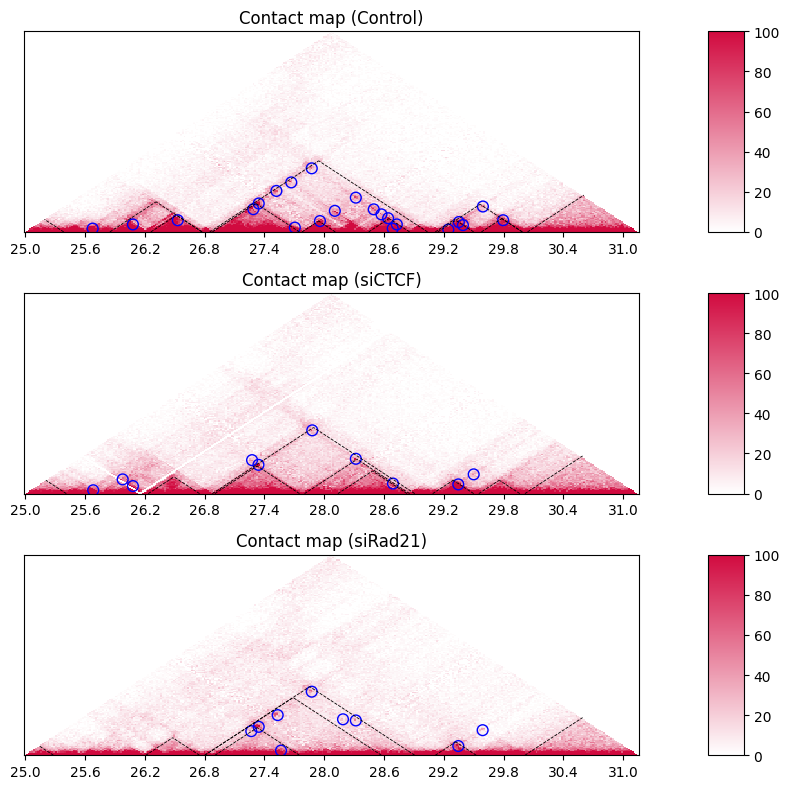

In [39]:
chr="chr21"
s = 25000000
e = 31000000
resolution = 25000
norm = "SCALE"

# Parameters for drawing
nrow_now = 0
nrow_heatmap = 4
nrow = nrow_heatmap * 3
colspan_plot = 12
colspan_colorbar = 2
colspan_full = (colspan_plot + colspan_colorbar)
vmax = 100  # maximum value of the color scale
vmin = 0    # minimum value of the color scale
distancemax = 0

plt.figure(figsize=(8, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap
    
plt.tight_layout()

The black dashed lines and blue circles indicate TADs and loops, respectively.

If you don't want to plot TADs and loops, simply skip loading them.

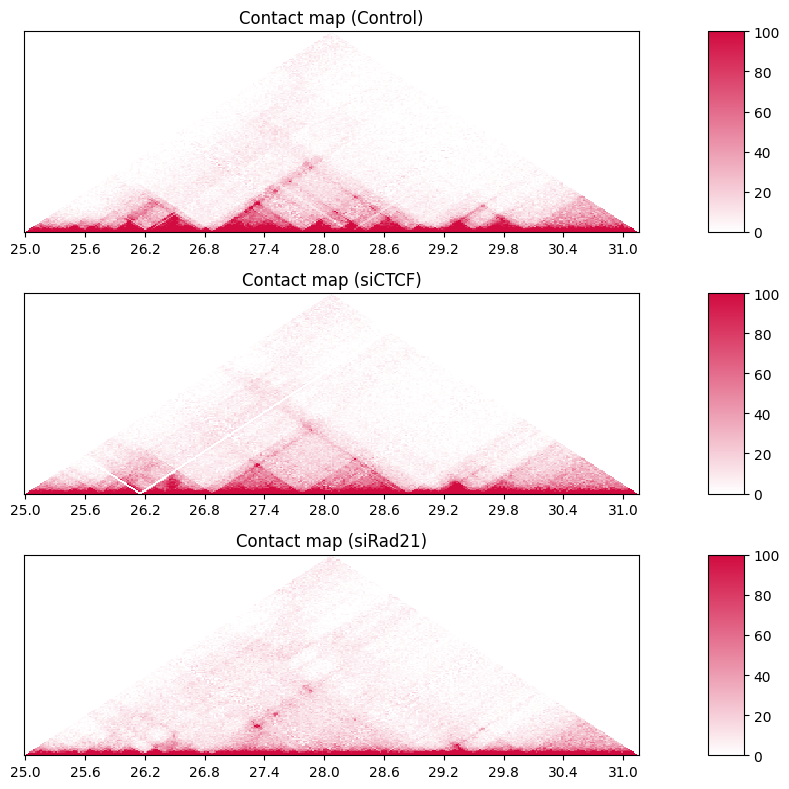

In [40]:
chr="chr21"
s = 25000000
e = 31000000
resolution = 25000
norm = "SCALE"

# Parameters for drawing
nrow_now = 0
nrow_heatmap = 4
nrow = nrow_heatmap * 3
colspan_plot = 12
colspan_colorbar = 2
colspan_full = (colspan_plot + colspan_colorbar)
vmax = 100  # maximum value of the color scale
vmin = 0    # minimum value of the color scale
distancemax = 0

plt.figure(figsize=(8, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full)
    nrow_now += nrow_heatmap
    
plt.tight_layout()

When visualizing a broader region, the triangle becomes too large to see each TAD and loop.
In this case, set the `distance_max` parameter in the `drawHeatmapTriangle_subplot2grid` function to limit the maximum distance of the triangles.

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


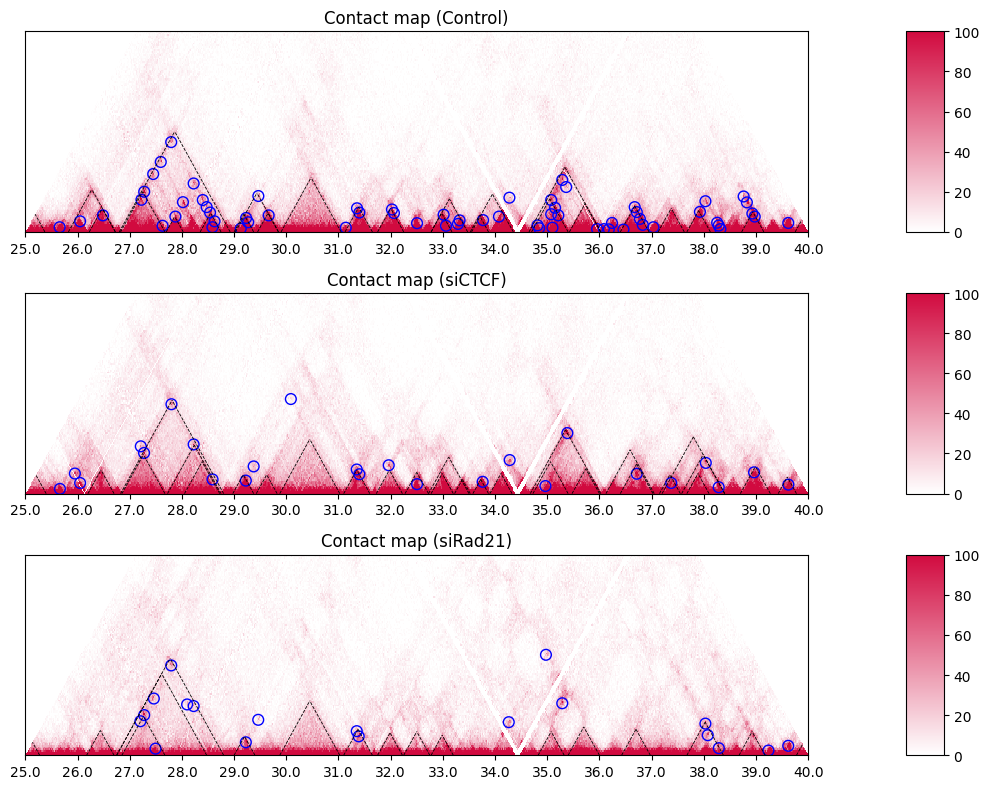

In [41]:
chr="chr21"
s = 25000000
e = 40000000
resolution = 25000
norm = "SCALE"
distancemax = 3000000 # Maximum distance for visualization

# Parameters for drawing
nrow_now = 0
nrow_heatmap = 4
nrow = nrow_heatmap * 3
colspan_plot = 12
colspan_colorbar = 2
colspan_full = (colspan_plot + colspan_colorbar)
vmax = 100  # maximum value of the color scale
vmin = 0    # minimum value of the color scale

plt.figure(figsize=(10, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap
    
plt.tight_layout()

## Adding 3D Features
Here is the way to visualize some 3D features.

### Compartment PC1

To distinguish the genomic positions from bin positions, let's define `figstart`/`figend` and `sbin`/`ebin`.
The resolution is 25 kbp.

In [42]:
figstart = 25000000
figend = 40000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)

The `plot_PC1` function plots the compartment PC1. The positive and negative values indicate the compartments A and B, respectively.

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


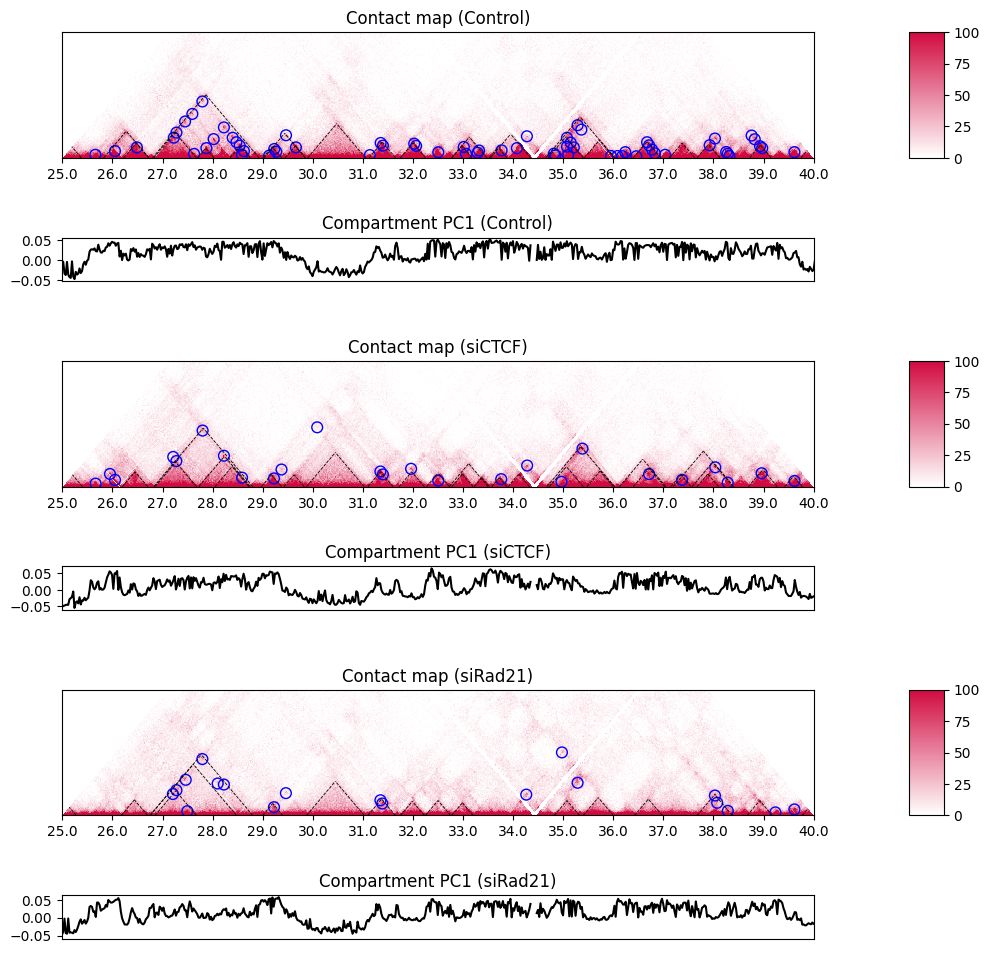

In [43]:
norm = "SCALE"

nrow_heatmap = 4
nrow_eigen = 2
nrow = (nrow_heatmap +1 + nrow_eigen +1) *3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 2
colspan_full = (colspan_plot + colspan_colorbar)
vmax = 100
vmin = 0

plt.figure(figsize=(10, 10))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap + 1
    
    plot_PC1(nrow, nrow_now, nrow_eigen, sample, label, sbin, ebin, colspan_plot, colspan_full)
    nrow_now += nrow_eigen + 1
    
plt.tight_layout()

### Single insulation score

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


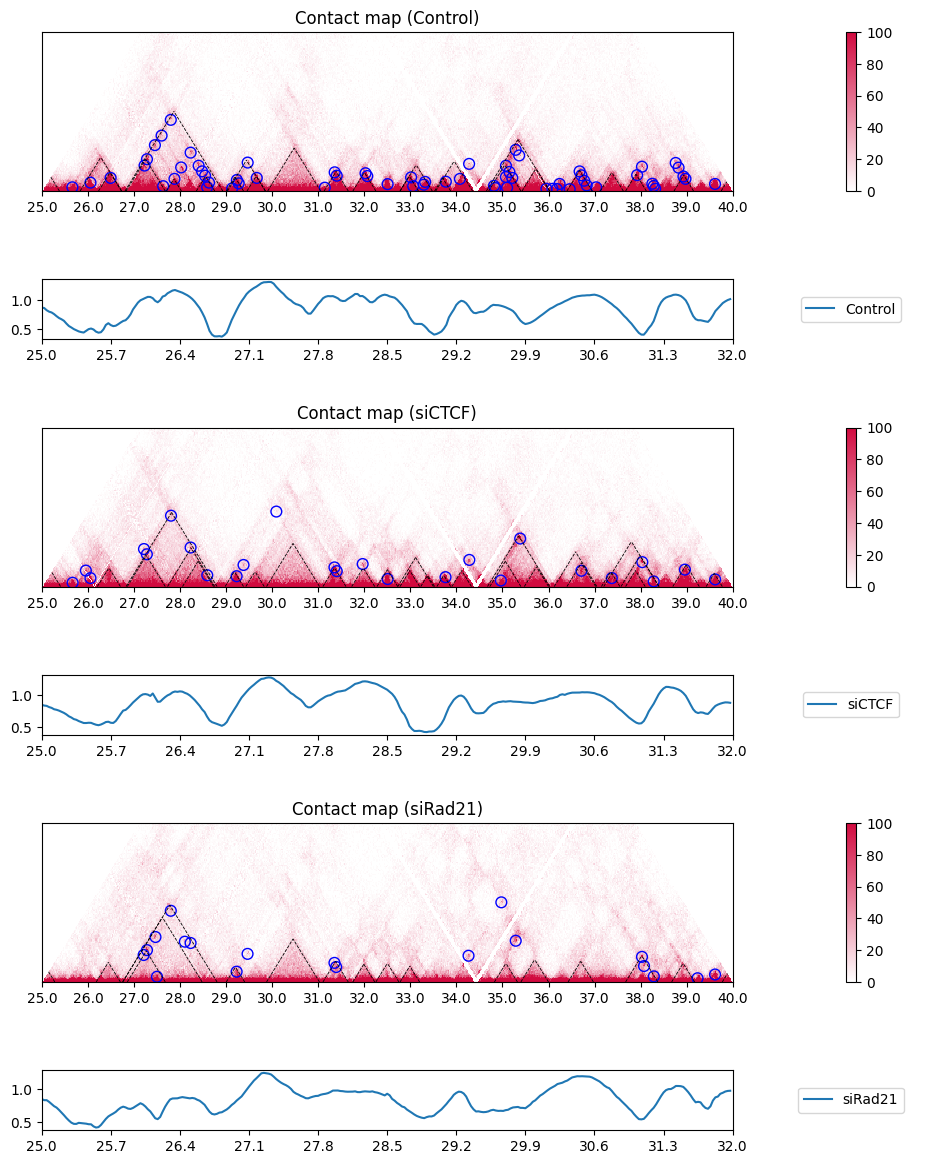

In [44]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 2
nrow = (nrow_heatmap +1 + nrow_feature + 1) * 3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0

plt.figure(figsize=(10, 12))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap + 1
    
    plot_single_insulation_score(sample, label, nrow, nrow_now, nrow_feature,
                                 figstart, figend, sbin, ebin,
                                 colspan_plot, colspan_colorbar, colspan_legend, colspan_full)

    nrow_now += nrow_feature + 1
    
plt.tight_layout()

You can view the insulation scores of all samples in this way:

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


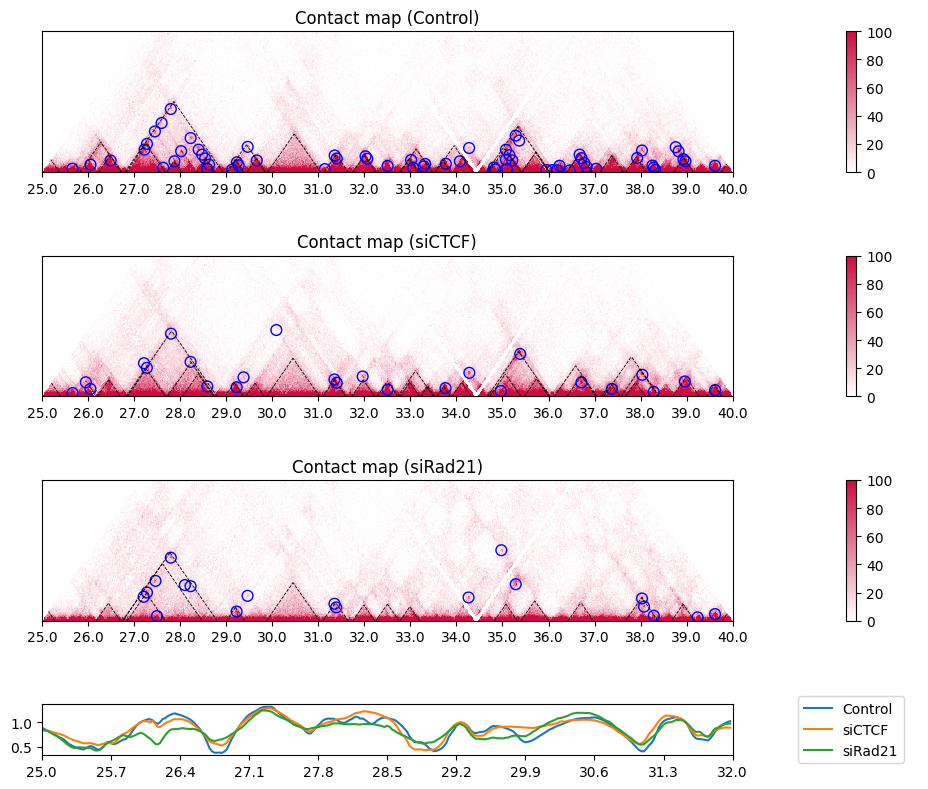

In [45]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 2
nrow = (nrow_heatmap +1) * 3 + nrow_feature
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0

plt.figure(figsize=(10, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap +1

plot_single_insulation_score(samples, samplelist, nrow, nrow_now, nrow_feature,
                             figstart, figend, sbin, ebin,
                             colspan_plot, colspan_colorbar, colspan_legend, colspan_full)

plt.tight_layout()

If you want to display the insulation score of the samples as a heatmap, use the options `heatmap=True, lineplot=False`.
In the heatmap, red regions indicate lower values (i.e. insulated regions).

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


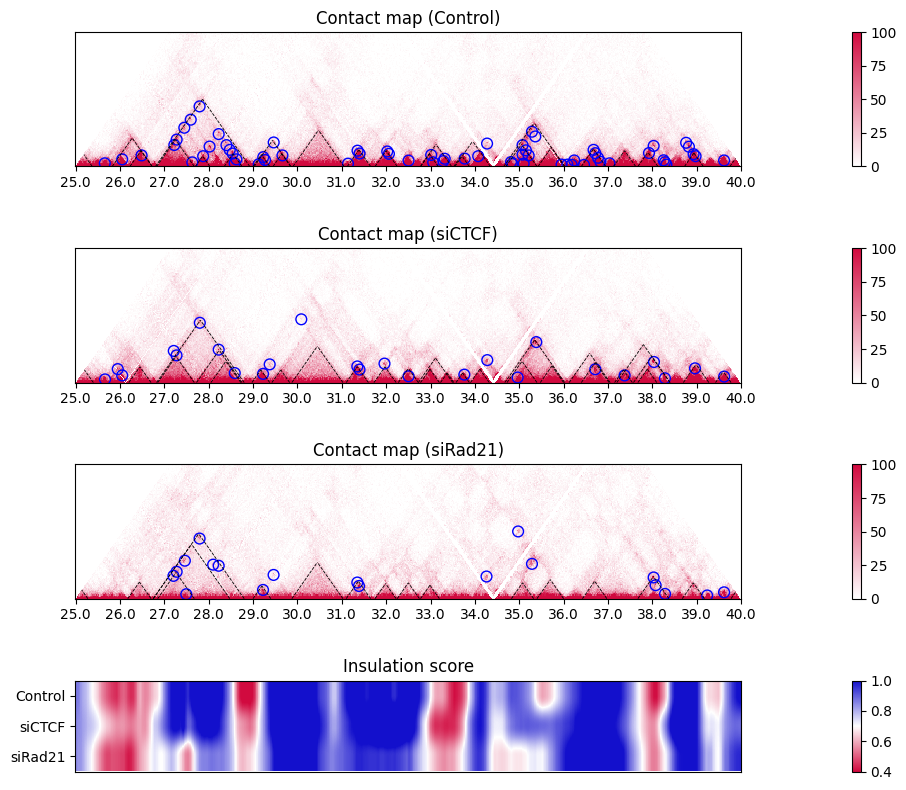

In [46]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 3
nrow = (nrow_heatmap +1) * 3 + nrow_feature
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0

plt.figure(figsize=(10, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap +1

plot_single_insulation_score(samples, samplelist, nrow, nrow_now, nrow_feature,
                             figstart, figend, sbin, ebin,
                             colspan_plot, colspan_colorbar, colspan_legend, colspan_full,
                             heatmap=True, lineplot=False)

plt.tight_layout()

### Multi-scale insulation scores

The `plot_multi_insulation_score` function plots multi-scale insulation scores. The plot is similar to the one above (single insulation score for multiple samples), but note that this heatmap shows the insulation score at the different scale for each sample.

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


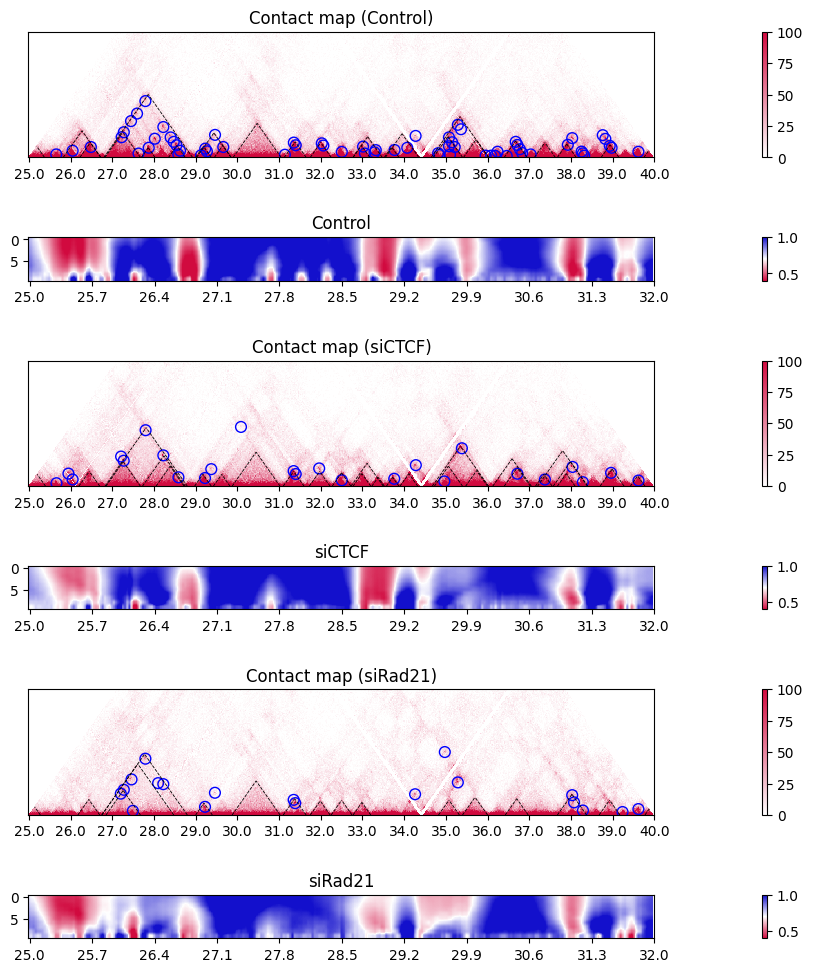

In [47]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 2
nrow = (nrow_heatmap +1 + nrow_feature + 1) * 3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0

plt.figure(figsize=(9, 10))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap + 1
    
    plot_multi_insulation_score(sample, label, nrow, nrow_now, nrow_feature,
                                figstart, figend, sbin, ebin,
                                colspan_plot, colspan_colorbar, colspan_full)
    nrow_now += nrow_feature + 1
    
plt.tight_layout()

### Directionality index

Use the `plot_directionality_index` function to plot the directionality index.

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


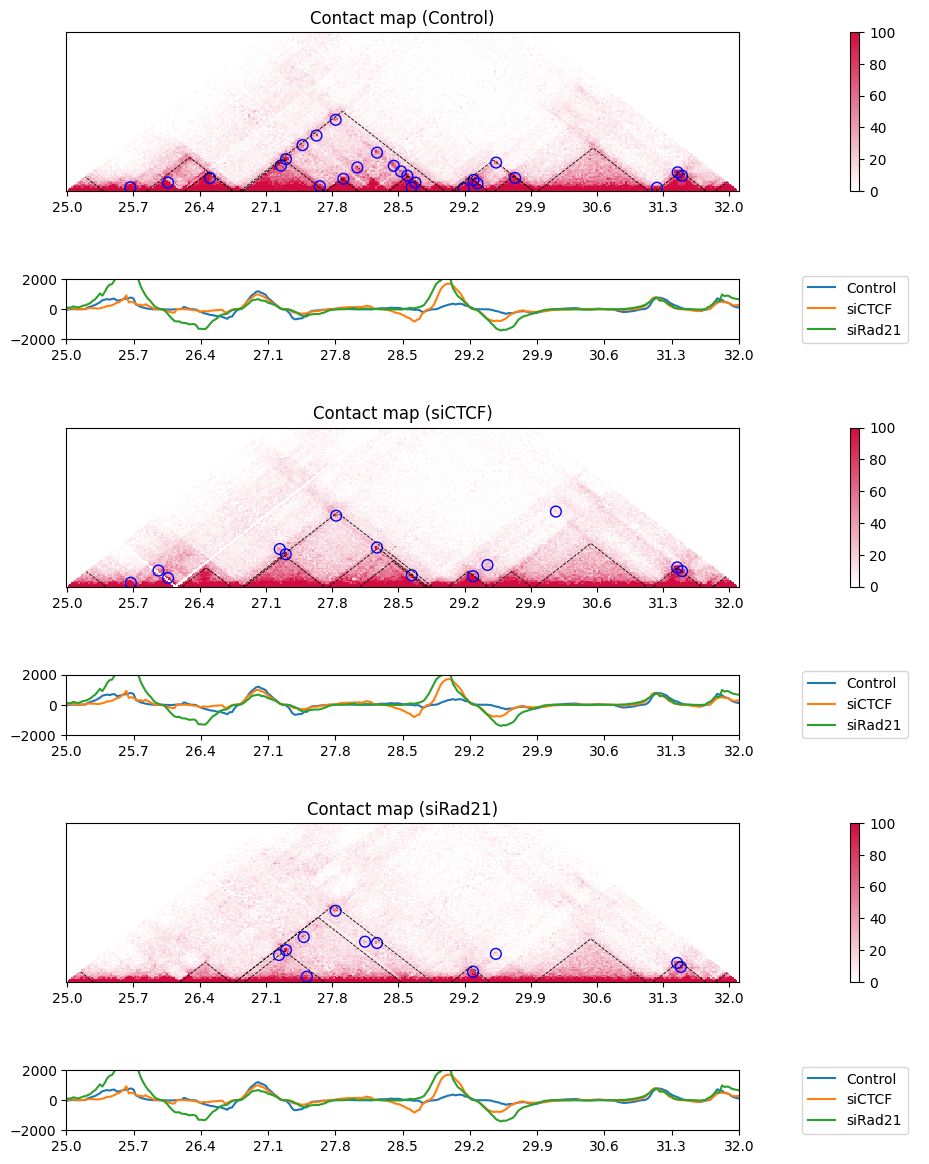

In [48]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distance = 500000 # distance for DI
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 2
nrow = (nrow_heatmap +1 + nrow_feature + 1) * 3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0
DI_vmin = -2000  # Mimnimum value of Directionality index
DI_vmax = 2000   # Maximum value of Directionality index

plt.figure(figsize=(10, 12))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, figstart, figend, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap + 1
    
    plot_directionality_index(samples, samplelist, nrow, nrow_now, nrow_feature,
                              sbin, ebin, figstart, figend, distance, 
                              colspan_plot, colspan_colorbar, colspan_legend, colspan_full,
                              vmin=DI_vmin, vmax=DI_vmax)
    nrow_now += nrow_feature + 1
    
plt.tight_layout()

CustardPyResults_Hi-C/Juicer_hg38/Control/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/Control/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siCTCF/loops/SCALE/merged_loops.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/TAD/SCALE/25000_blocks.bedpe
CustardPyResults_Hi-C/Juicer_hg38/siRad21/loops/SCALE/merged_loops.bedpe


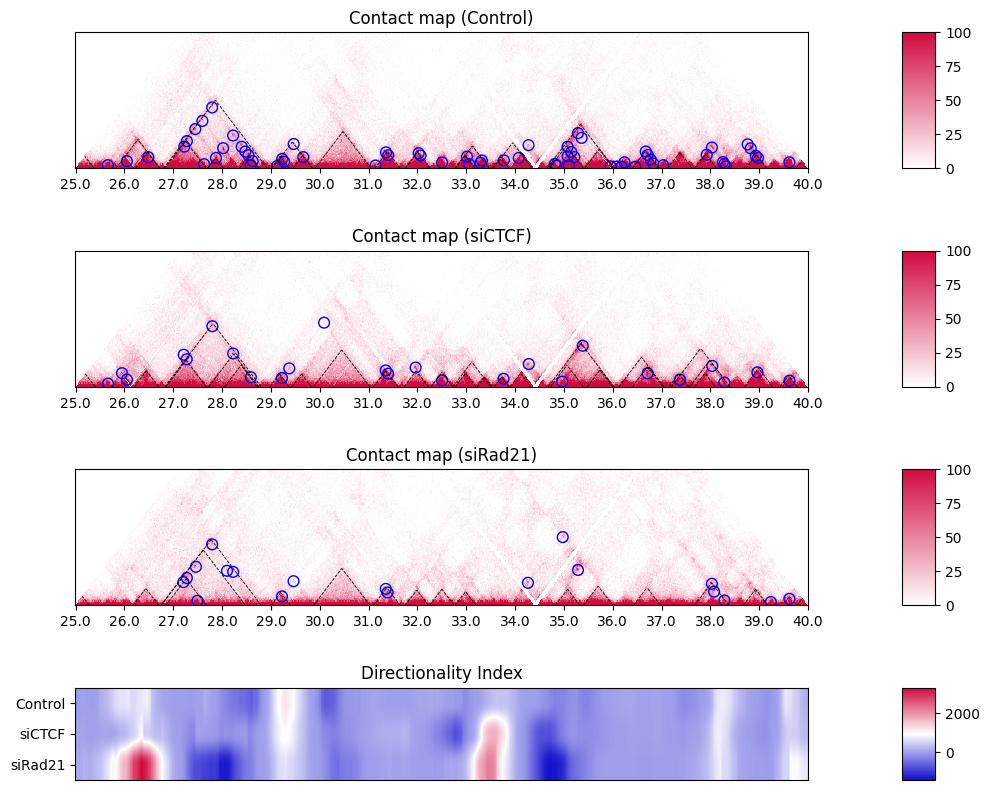

In [49]:
figstart = 25000000
figend = 32000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distance = 500000 # distance for DI
distancemax = 3000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 3
nrow = (nrow_heatmap +1) * 3 + nrow_feature
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 1
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 100
vmin = 0

plt.figure(figsize=(10, 8))
for i, sample in enumerate(samples):
    label = samplelist[i]
    tadfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/TAD/" + norm + "/" + str(resolution) + "_blocks.bedpe"
    loopfile = "CustardPyResults_Hi-C/Juicer_hg38/" + label + "/loops/" + norm + "/merged_loops.bedpe"

    plot_HiC_Map(nrow, nrow_now, nrow_heatmap, sample, label, chr,
                type, resolution, vmax, vmin, s, e, distancemax,
                colspan_plot, colspan_colorbar, colspan_full,
                tadfile=tadfile, loopfile=loopfile)
    nrow_now += nrow_heatmap +1

plot_directionality_index(samples, samplelist, nrow, nrow_now, nrow_feature,
                          sbin, ebin, figstart, figend, distance, 
                          colspan_plot, colspan_colorbar, colspan_legend, colspan_full,
                          vmin=DI_vmin, vmax=DI_vmax, heatmap=True, lineplot=False)

plt.tight_layout()

## Log ratio heatmap

To directly examine the depletion effect in the contact matrix, we visualize the log ratio heatmap here.
First, create log-ratio matrix using the `make3dmatrixRatio` function. The `smooth_median_filter` parameter is used to smooth the data to mitigate the low coverage of the sparse matrix.

In [50]:
smooth_median_filter = 3
Combined = make3dmatrixRatio(samples, smooth_median_filter)
labels = ["siCTCF", "siRad21"]

The `Combined` object stores the log-ratio matrix of `siCTCF/Control` and `siRad21/Control`. 
You can use it to view the log-ratio heatmap as shown below.

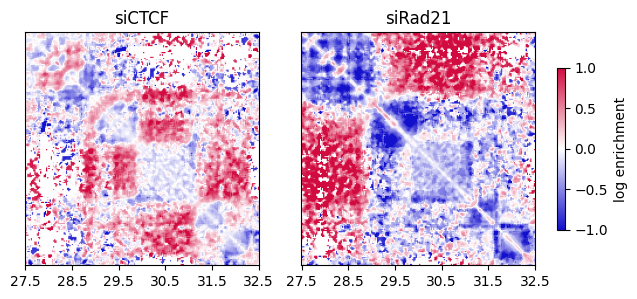

In [51]:
figstart = 27500000
figend   = 32500000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
vmax = 1
vmin = -1

plt.figure(figsize=(6, 3))
for i in range(len(labels)):
    ax = plt.subplot(1, 2, i+1)
    im = ax.imshow(Combined[i, sbin:ebin,sbin:ebin], clim=(vmin, vmax), cmap=cm)
    ax.set_title(labels[i])
    pltxticks_subplot2grid(0, ebin-sbin, figstart, figend, 5, ax=ax)
    ax.set_yticks([])

plt.tight_layout()
cbar = plt.colorbar(im, ax=plt.gcf().axes, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('log enrichment')

Red and blue regions indicate increased and decreased contact frequency, respectively, after depletion.

To draw the triangle heatmap, use the `drawHeatmapTriangle_subplot2grid` function.

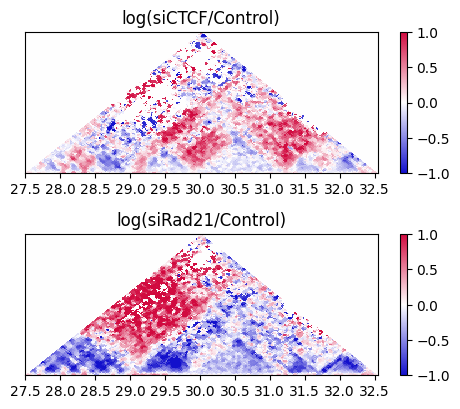

In [52]:
nrow = 8
nrow_now = 0
colspan_full = 30
figstart = 27500000
figend   = 32500000

plt.figure(figsize=(6, 8))
for i, sample in enumerate(Combined):
    ax  = plt.subplot2grid((nrow, colspan_full), (nrow_now, 0), rowspan=2, colspan=24)
    drawHeatmapTriangle_subplot2grid(sample, resolution,
                                     figstart=figstart, figend=figend, 
                                     vmax=1, vmin=-1, cmap=cm,
                                     label=labels[i], xticks=True,
                                     logratio=True, control_label='Control')
    nrow_now += 2

plt.tight_layout()

### Directional Relative Frequency 

Recently, we have defined a new score **Directional Relative Frequency (DRF)** that captures the asymmetric changes in inter-TAD interactions after depletion [[Nakato et al, Nat Commun., 2023]](https://www.nature.com/articles/s41467-023-41316-4). 

The `plot_directional_relative_frequency` function visualizes the line plot and heatmap of the DRF.

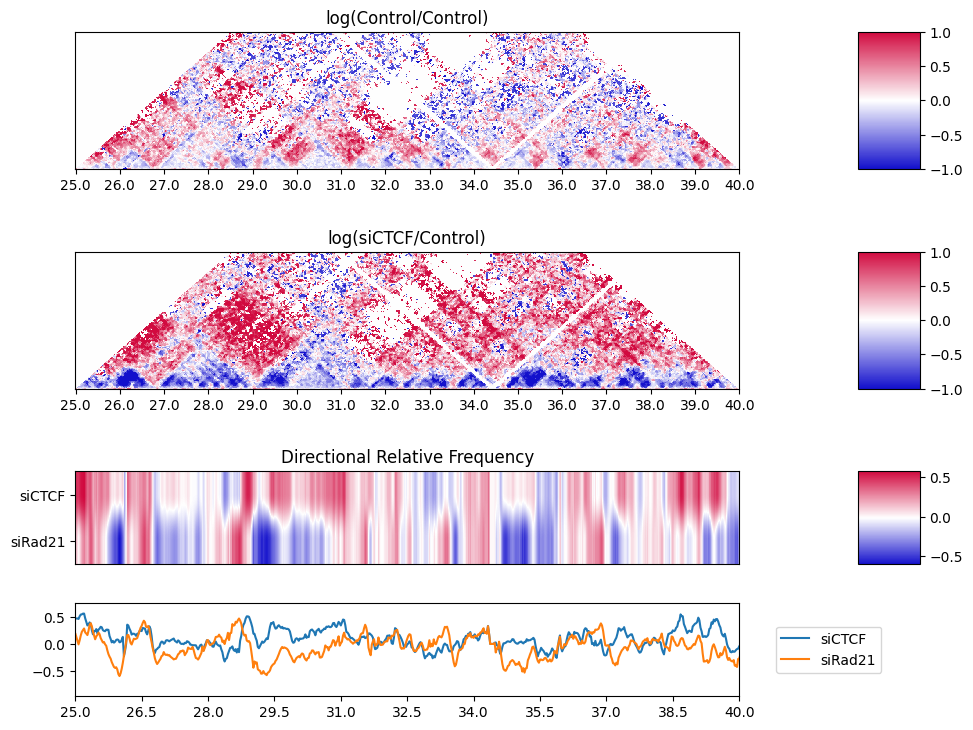

In [53]:
figstart = 25000000
figend = 40000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 5000000 # Maximum distance for visualization
norm = "SCALE"

nrow_heatmap = 4
nrow_feature = 3
nrow = (nrow_heatmap +1 + nrow_feature + 1) * 3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 2
colspan_legend = 2
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmax = 1
vmin = -1

plt.figure(figsize=(10, 12))
for i, sample in enumerate(Combined):
    label = samplelist[i]
    heatmap_ax  = plt.subplot2grid((nrow, colspan_full), (nrow_now, 0),
                                    rowspan=nrow_heatmap, colspan=colspan_plot)
    colorbar_ax = plt.subplot2grid((nrow, colspan_full), (nrow_now, colspan_plot +1),
                                    rowspan=nrow_heatmap, colspan=colspan_colorbar)

    drawHeatmapTriangle_subplot2grid(sample, resolution, figstart=figstart, figend=figend, 
                                     vmax=vmax, vmin=vmin, cmap=cm, label=label, xticks=True,
                                     logratio=True, control_label='Control', 
                                     heatmap_ax=heatmap_ax, colorbar_ax=colorbar_ax)
    nrow_now += nrow_heatmap + 1

plot_directional_relative_frequency(samples, samplelist,  nrow, nrow_now, nrow_feature, 
                                    sbin, ebin, figstart, figend, resolution, 
                                    True, True,
                                    colspan_plot, colspan_colorbar, colspan_legend, colspan_full)

plt.tight_layout()

The DRF does not distinguish whether the right side is enriched or the left side is depleted when the score is high. By using the `plot_triangle_ratio_multi` function, it is possible to visualize the scores on both the left and right sides.

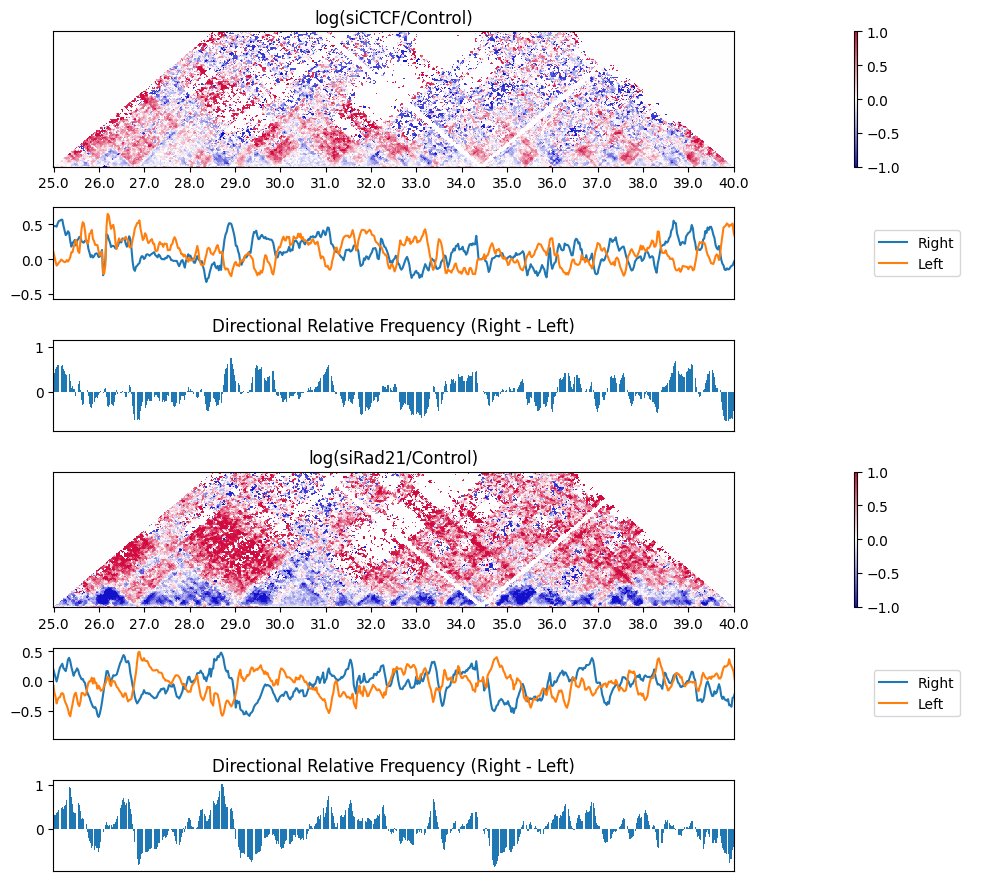

In [54]:
figstart = 25000000
figend = 40000000
resolution = 25000
sbin = int(figstart / resolution)
ebin = int(figend   / resolution)
distancemax = 5000000 # Maximum distance for visualization

nrow_heatmap = 4
nrow_feature = 3
nrow = (nrow_heatmap +1 + nrow_feature + 1) * 3
nrow_now = 0
colspan_plot = 12
colspan_colorbar = 1
colspan_legend = 3
colspan_full = (colspan_plot + colspan_colorbar + colspan_legend)
vmin = -1
vmax = 1

plt.figure(figsize=(10, 12))
plot_triangle_ratio_multi(samples, samplelist, nrow, nrow_now, nrow_heatmap, nrow_feature,
                                  sbin, ebin, figstart, figend, distancemax, resolution,
                                  vmin, vmax, colspan_plot, colspan_colorbar, colspan_legend, colspan_full)

plt.tight_layout()

To obtain the distribution of the DRF, you can use the `get_drf_matrix` function.

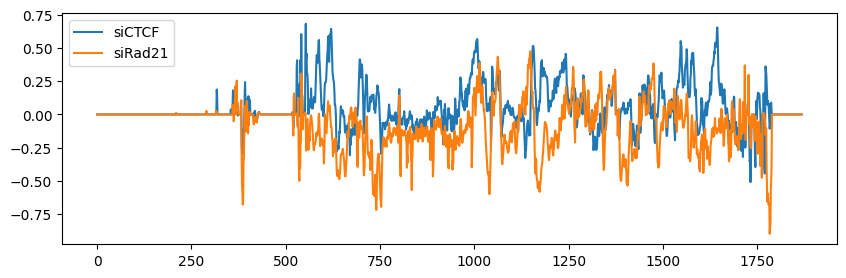

In [55]:
drf_right = True
drf_left = True
DRFMatrix = get_drf_matrix(samples, resolution, drf_right, drf_left)

plt.figure(figsize=(10, 3))
for i, sample in enumerate(DRFMatrix):
   plt.plot(sample, label=labels[i])

plt.legend()

In [56]:
import session_info

session_info.show()